In [32]:
import pandas as pd
import numpy as np

this is my *notes*

In [33]:
total_df = pd.read_csv('./data_gathering/imdb_ratings.csv')
total_df = total_df.loc[total_df["budget"].notna()]
total_df = total_df.loc[total_df["budget"] != np.float64(0.0)]
total_df = total_df.loc[total_df["global_revenue"].notna()]
total_df = total_df.loc[total_df["global_revenue"] != np.float64(0.0)]
total_df = total_df.rename(columns={"global_revenue":"revenue"})
total_df = total_df.drop(columns={"release_date"})
total_df = total_df.set_index("title")
total_df

,runtime,genre,averageRating,budget,revenue
title,,,,,
Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,533200000.0,2.056047e+09
Avatar: The Way of Water,192,"Action,Adventure,Fantasy",7.5,460000000.0,2.317514e+09
Indiana Jones and the Dial of Destiny,154,"Action,Adventure,Sci-Fi",6.5,402300000.0,3.839631e+08
Avengers: Endgame,181,"Action,Adventure,Drama",8.4,400000000.0,2.748243e+09
Pirates of the Caribbean: On Stranger Tides,136,"Action,Adventure,Fantasy",6.6,379000000.0,1.045714e+09
...,...,...,...,...,...
Cavite,80,"Crime,Drama,Thriller",6.0,7000.0,7.164400e+04
The Mongol King,NaN,NaN,NaN,7000.0,9.000000e+02
Following,69,"Crime,Mystery,Thriller",7.4,6000.0,2.404950e+05


In [34]:
profit_col = []
for i in total_df.index:
    profit_col.append(total_df.loc[i, "revenue"] - total_df.loc[i, "budget"])
profit_col = pd.DataFrame({"profit":profit_col})
profit_col = profit_col.set_index(total_df.index)
general_df = pd.concat([total_df, profit_col], axis=1)
general_df

,runtime,genre,averageRating,budget,revenue,profit
title,,,,,,
Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,533200000.0,2.056047e+09,1.522847e+09
Avatar: The Way of Water,192,"Action,Adventure,Fantasy",7.5,460000000.0,2.317514e+09,1.857514e+09
Indiana Jones and the Dial of Destiny,154,"Action,Adventure,Sci-Fi",6.5,402300000.0,3.839631e+08,-1.833694e+07
Avengers: Endgame,181,"Action,Adventure,Drama",8.4,400000000.0,2.748243e+09,2.348243e+09
Pirates of the Caribbean: On Stranger Tides,136,"Action,Adventure,Fantasy",6.6,379000000.0,1.045714e+09,6.667138e+08
...,...,...,...,...,...,...
Cavite,80,"Crime,Drama,Thriller",6.0,7000.0,7.164400e+04,6.464400e+04
The Mongol King,NaN,NaN,NaN,7000.0,9.000000e+02,-6.100000e+03
Following,69,"Crime,Mystery,Thriller",7.4,6000.0,2.404950e+05,2.344950e+05


In [35]:
horror_df = pd.read_excel("./csv_input/horror_movies.xlsx")
horror_df = horror_df[["title", "original_language", "budget", "revenue", "status", "release_date"]]
# we removed the overview but it may be useful later
horror_df = horror_df.loc[horror_df["status"] != "In Production", :]
horror_df['release_year'] = horror_df['release_date'].dt.year
horror_df['release_month'] = horror_df['release_date'].dt.month
horror_df = horror_df.drop(columns={"release_date", "status", "budget", "revenue"})
horror_df = horror_df.set_index("title")
horror_df

,original_language,release_year,release_month
title,,,
Oracle,en,2022,12
Puppeteer,ru,2022,12
The Field,en,2022,12
Scare Package II: Rad Chad’s Revenge,en,2022,12
Unicorn Wars,es,2022,12
...,...,...,...
Kankal,bn,1950,7
The Fall of the House of Usher,en,1950,6
The Rockingham Tea Set,en,1950,1


In [46]:
combined_df = horror_df.merge(general_df, left_index=True, right_index=True)
combined_df = combined_df[~combined_df.index.duplicated(keep='first')]
combined_df

,original_language,release_year,release_month,runtime,genre,averageRating,budget,revenue,profit
title,,,,,,,,,
Venus,es,2022,12,\N,\N,5.9,6000000.0,7818479.0,1818479.0
The Menu,en,2022,11,90,"Crime,Drama",6.2,30000000.0,75820378.0,45820378.0
Terror Train,en,2022,10,97,"Horror,Mystery,Thriller",5.8,3500000.0,8000000.0,4500000.0
Halloween Ends,en,2022,10,111,"Drama,Horror,Mystery",5.0,20000000.0,105400796.0,85400796.0
The Visitor,en,2022,10,108,"Horror,Sci-Fi",5.2,4000000.0,19174817.0,15174817.0
...,...,...,...,...,...,...,...,...,...
A Ghost Story,en,1964,2,92,"Drama,Fantasy,Mystery",6.8,100000.0,2769782.0,2669782.0
Insomnia,fr,1963,1,85,Comedy,5.5,46000000.0,113622499.0,67622499.0
Where the Truth Lies,fr,1962,3,83,Thriller,6.4,25000000.0,1415656.0,-23584344.0


# THE STATS BEGIN!!!!

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

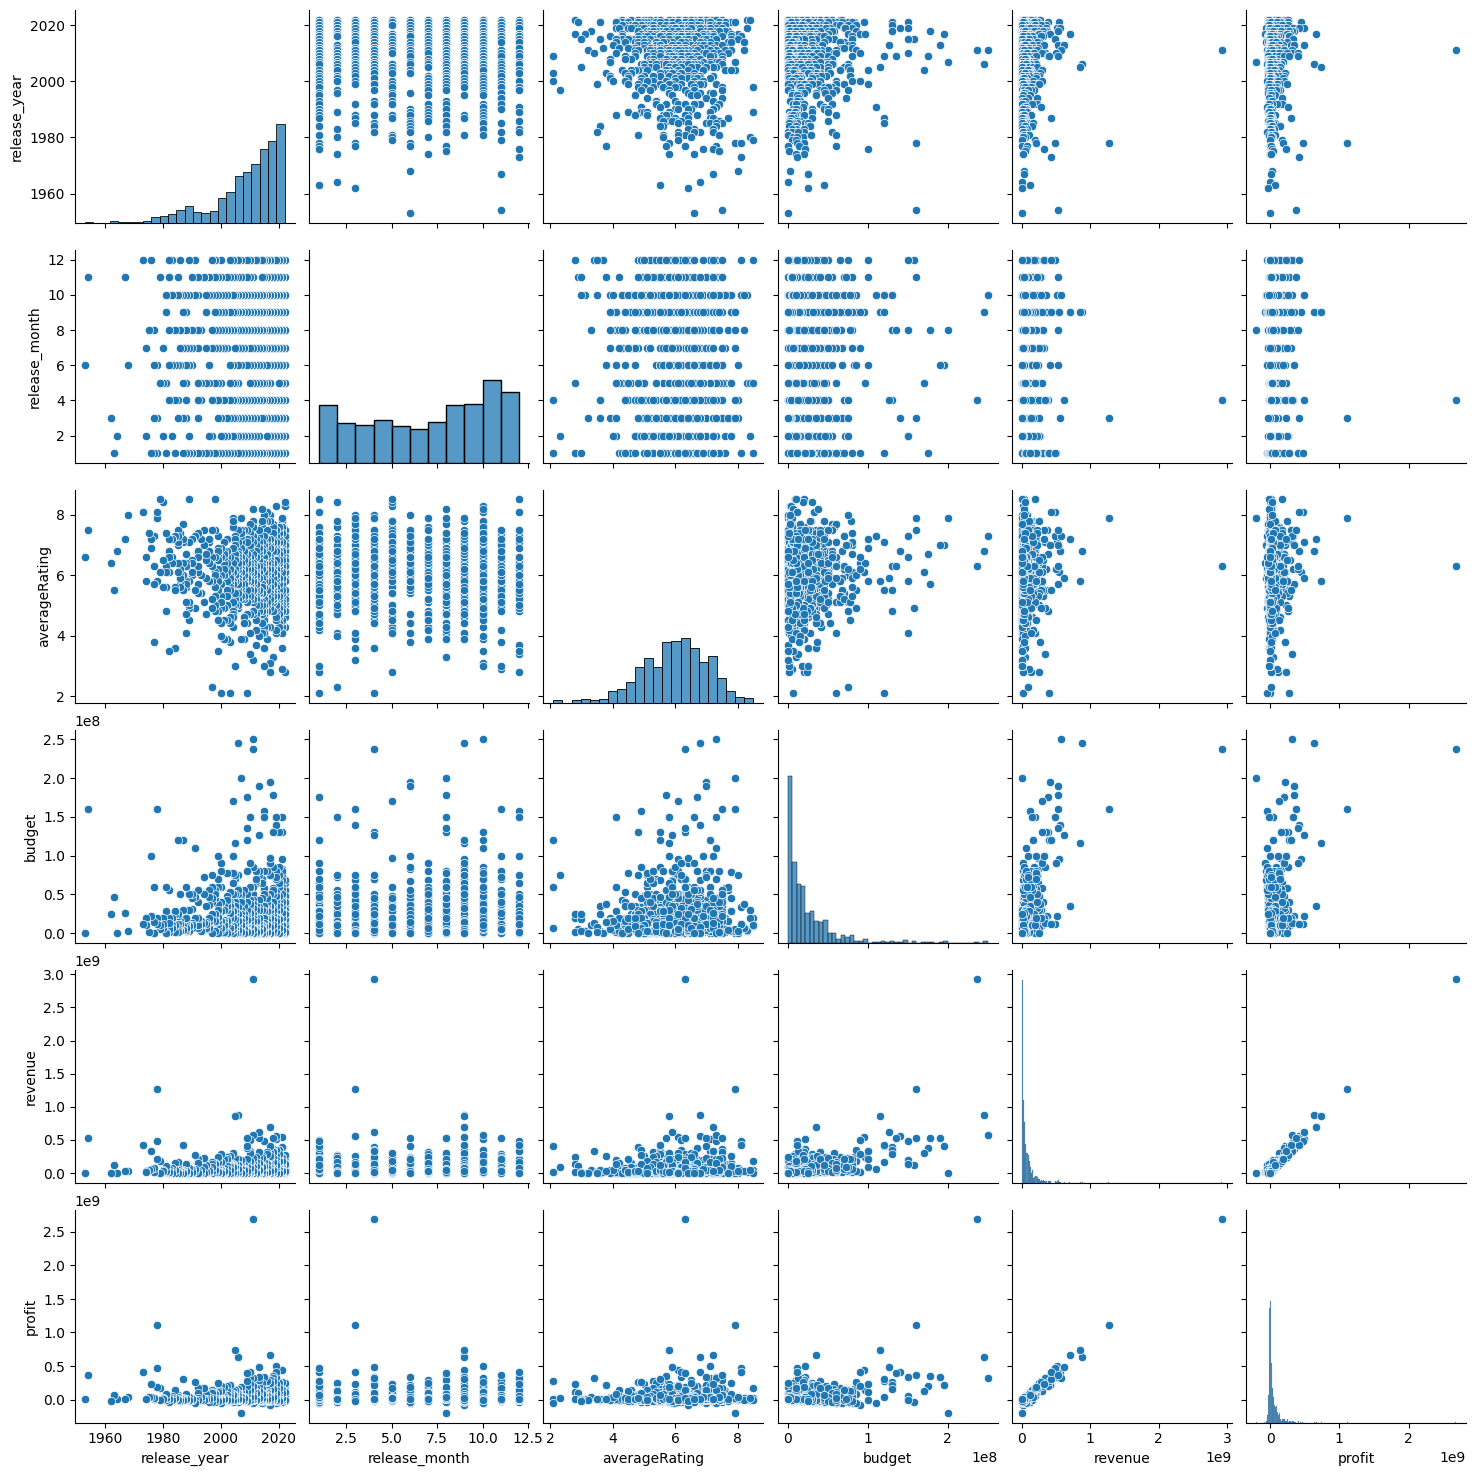

In [48]:
sns.pairplot(combined_df)
plt.show()